**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( B )

---


Engenheiro(a) do conhecimento:
* William Teixeira Pires Junior

---

# Solução para o Problema

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

In [ ]:
df = pandas.read_csv('reduced_df.csv')

solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        y = df['DEATH_EVENT']
        X = df.drop('DEATH_EVENT', axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        gnb = GaussianNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        accuracy = classification_report(y_test,y_pred,output_dict=True)['accuracy']
        solutions[t_size].append([r_state, accuracy])

In [70]:
solutions[0.3].sort(key=lambda x: x[1], reverse=True)
print(solutions[0.3][0])
print(solutions[0.3][1])
print(solutions[0.3][2])
print(solutions[0.3][3])
print(solutions[0.3][4])

print('...')

print(solutions[0.3][995])
print(solutions[0.3][996])
print(solutions[0.3][997])
print(solutions[0.3][998])
print(solutions[0.3][999])


[492, 0.7888888888888889]
[776, 0.7888888888888889]
[668, 0.7777777777777778]
[180, 0.7666666666666667]
[236, 0.7666666666666667]
...
[427, 0.3]
[751, 0.3]
[124, 0.28888888888888886]
[450, 0.2777777777777778]
[439, 0.25555555555555554]


In [113]:
max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)
    print("Max accuracy for test_size=",t_size," was with random_state=",solutions[t_size][0][0],
          " and achieved accuracy=",solutions[t_size][0][1])
    print("Min accuracy for test_size=",t_size," was with random_state=",solutions[t_size][999][0],
          " and achieved accuracy=",solutions[t_size][999][1])
    print("-----------------------------------------------------")
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][999][1], decimals=2))

Max accuracy for test_size= 0.1  was with random_state= 947  and achieved accuracy= 0.9
Min accuracy for test_size= 0.1  was with random_state= 280  and achieved accuracy= 0.23333333333333334
-----------------------------------------------------
Max accuracy for test_size= 0.2  was with random_state= 236  and achieved accuracy= 0.85
Min accuracy for test_size= 0.2  was with random_state= 15  and achieved accuracy= 0.25
-----------------------------------------------------
Max accuracy for test_size= 0.3  was with random_state= 492  and achieved accuracy= 0.7888888888888889
Min accuracy for test_size= 0.3  was with random_state= 439  and achieved accuracy= 0.25555555555555554
-----------------------------------------------------
Max accuracy for test_size= 0.4  was with random_state= 563  and achieved accuracy= 0.7666666666666667
Min accuracy for test_size= 0.4  was with random_state= 629  and achieved accuracy= 0.2833333333333333
-----------------------------------------------------
Ma

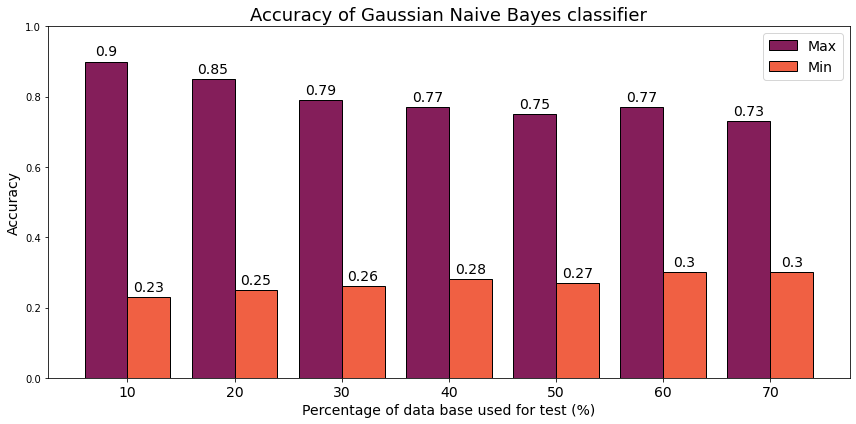

In [132]:
labels = ["10", "20", "30", "40", "50", "60", "70"]
x = numpy.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars
colors = seaborn.color_palette('rocket', n_colors=2)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Percentage of data base used for test (%)', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=14)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Accuracy of Gaussian Naive Bayes classifier', fontsize=18)

fig.tight_layout()

plt.show()

0.7111111111111111


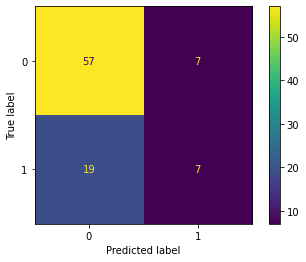

In [60]:
df = pandas.read_csv('reduced_df.csv')

y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=cnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

print(classification_report(y_test,y_pred))

In [ ]:
df = pandas.read_csv('reduced_df.csv')

solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        y = df['DEATH_EVENT']
        X = df.drop('DEATH_EVENT', axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        cnb = CategoricalNB()
        cnb.fit(X_train, y_train)
        try:
            y_pred = cnb.predict(X_test)
        except IndexError:
            continue
        accuracy = classification_report(y_test,y_pred,output_dict=True)['accuracy']
        solutions[t_size].append([r_state, accuracy])

In [ ]:
max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)
    last = len(solutions[t_size]) - 1
    print("Max accuracy for test_size=",t_size," was with random_state=",solutions[t_size][0][0],
          " and achieved accuracy=",solutions[t_size][0][1])
    print("Min accuracy for test_size=",t_size," was with random_state=",solutions[t_size][last][0],
          " and achieved accuracy=",solutions[t_size][last][1])
    print("-----------------------------------------------------")
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][last][1], decimals=2))

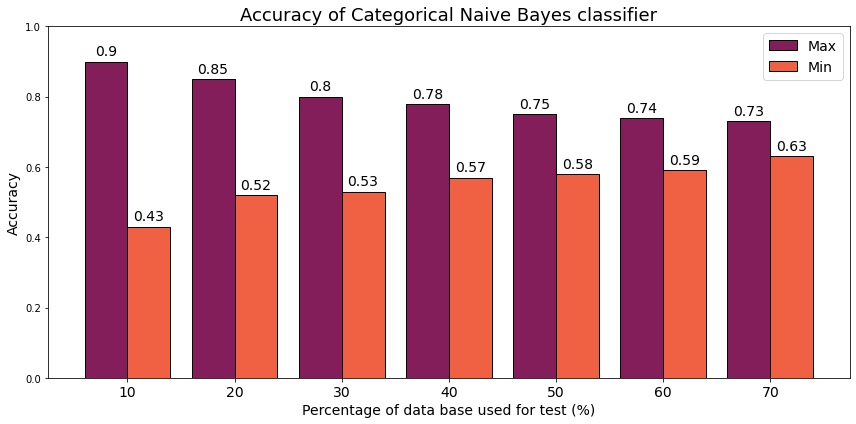

In [141]:
labels = ["10", "20", "30", "40", "50", "60", "70"]
x = numpy.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars
colors = seaborn.color_palette('rocket', n_colors=2)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Percentage of data base used for test (%)', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=14)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Accuracy of Categorical Naive Bayes classifier', fontsize=18)

fig.tight_layout()

plt.show()

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        64
           1       0.36      0.15      0.22        26

    accuracy                           0.68        90
   macro avg       0.54      0.52      0.51        90
weighted avg       0.62      0.68      0.63        90



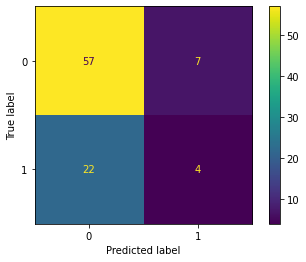

In [52]:
df = pandas.read_csv('reduced_df.csv')

y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=cnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

print(classification_report(y_test,y_pred))

In [ ]:
df = pandas.read_csv('reduced_df.csv')

solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        y = df['DEATH_EVENT']
        X = df.drop('DEATH_EVENT', axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        bnb = BernoulliNB()
        bnb.fit(X_train, y_train)
        try:
            y_pred = bnb.predict(X_test)
        except IndexError:
            continue
        accuracy = classification_report(y_test,y_pred,output_dict=True)['accuracy']
        solutions[t_size].append([r_state, accuracy])

In [143]:
max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)
    last = len(solutions[t_size]) - 1
    print("Max accuracy for test_size=",t_size," was with random_state=",solutions[t_size][0][0],
          " and achieved accuracy=",solutions[t_size][0][1])
    print("Min accuracy for test_size=",t_size," was with random_state=",solutions[t_size][last][0],
          " and achieved accuracy=",solutions[t_size][last][1])
    print("-----------------------------------------------------")
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][last][1], decimals=2))

Max accuracy for test_size= 0.1  was with random_state= 947  and achieved accuracy= 0.9333333333333333
Min accuracy for test_size= 0.1  was with random_state= 830  and achieved accuracy= 0.43333333333333335
-----------------------------------------------------
Max accuracy for test_size= 0.2  was with random_state= 693  and achieved accuracy= 0.85
Min accuracy for test_size= 0.2  was with random_state= 366  and achieved accuracy= 0.48333333333333334
-----------------------------------------------------
Max accuracy for test_size= 0.3  was with random_state= 976  and achieved accuracy= 0.7888888888888889
Min accuracy for test_size= 0.3  was with random_state= 830  and achieved accuracy= 0.5111111111111111
-----------------------------------------------------
Max accuracy for test_size= 0.4  was with random_state= 132  and achieved accuracy= 0.7916666666666666
Min accuracy for test_size= 0.4  was with random_state= 830  and achieved accuracy= 0.5416666666666666
--------------------------

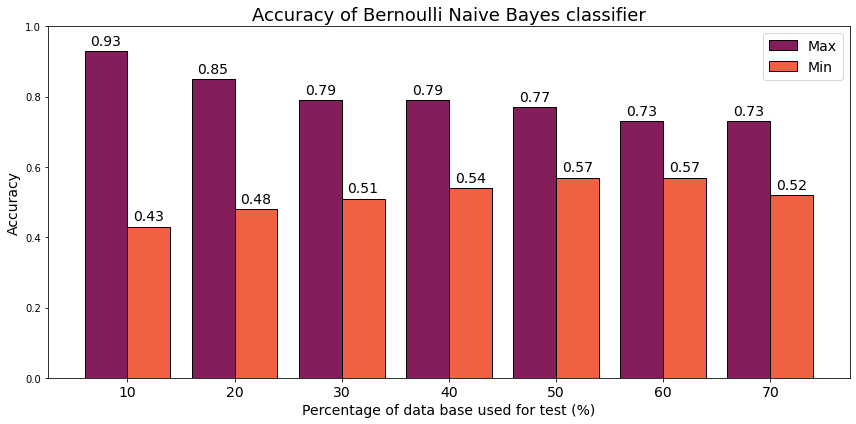

In [145]:
labels = ["10", "20", "30", "40", "50", "60", "70"]
x = numpy.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars
colors = seaborn.color_palette('rocket', n_colors=2)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Percentage of data base used for test (%)', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=14)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Accuracy of Bernoulli Naive Bayes classifier', fontsize=18)

fig.tight_layout()

plt.show()